<a href="https://colab.research.google.com/github/JerKeller/2022_ML_Earth_Env_Sci/blob/main/Daphnia_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
train_path="/content/drive/MyDrive/Colab Notebooks/FinalData/Train"
test_path="/content/drive/MyDrive/Colab Notebooks/FinalData/Test"
validation_path="/content/drive/MyDrive/Colab Notebooks/FinalData/Val"

In [8]:
IMAGE_SIZE = [224, 224]

In [27]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [28]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)
    

In [30]:
x_val=[]

for folder in os.listdir(validation_path):
    sub_path=validation_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [31]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [32]:
train_x.shape,test_x.shape,val_x.shape

((491, 224, 224, 3), (154, 224, 224, 3), (122, 224, 224, 3))

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_x=train_x/250
test_x=test_x/250
val_x=val_x/250

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 491 images belonging to 2 classes.
Found 154 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [36]:
training_set.class_indices

{'Daphnia': 0, 'DaphniaSkins': 1}

In [37]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes
train_y.shape,test_y.shape,val_y.shape

((491,), (154,), (122,))

In [38]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [39]:
for layer in vgg.layers:
    layer.trainable = False

In [40]:
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

In [41]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [44]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
16/16 [==============================] - 375s 24s/step - loss: 7.1024 - accuracy: 0.8839 - val_loss: 3.9152 - val_accuracy: 0.9426
Epoch 2/10
16/16 [==============================] - 373s 24s/step - loss: 1.4764 - accuracy: 0.9063 - val_loss: 2.9533 - val_accuracy: 0.9426
Epoch 3/10
16/16 [==============================] - 373s 24s/step - loss: 0.4431 - accuracy: 0.9491 - val_loss: 3.3558 - val_accuracy: 0.9344
Epoch 4/10
16/16 [==============================] - 372s 24s/step - loss: 0.0667 - accuracy: 0.9939 - val_loss: 3.0365 - val_accuracy: 0.9344
Epoch 5/10
16/16 [==============================] - 372s 24s/step - loss: 0.0258 - accuracy: 0.9959 - val_loss: 2.8842 - val_accuracy: 0.9344
Epoch 6/10
16/16 [==============================] - 372s 24s/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 3.2108 - val_accuracy: 0.9262
Epoch 7/10
16/16 [==============================] - 373s 24s/step - loss: 8.8587e-07 - accuracy: 1.0000 - val_loss: 3.3776 - val_accuracy: 0.9262
Ep

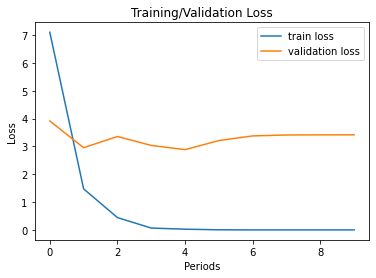

In [71]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title("Training/Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Periods')

plt.savefig('loss.png')
plt.show()

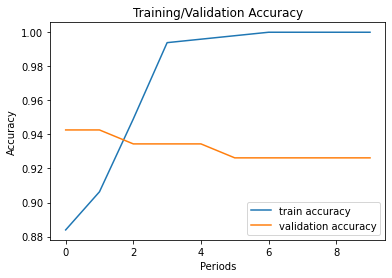

In [70]:
# accuracies
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title("Training/Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Periods')

plt.savefig('accuracy.png')
plt.show()

In [47]:
model.evaluate(test_x,test_y,batch_size=32)

5/5 [==============================] - 94s 19s/step - loss: 2.6255 - accuracy: 0.9416


[2.625492572784424, 0.9415584206581116]

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"


In [59]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
accuracy_score(y_pred,test_y)

0.9415584415584416

In [61]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       154
           1       0.00      0.00      0.00         0

    accuracy                           0.94       154
   macro avg       0.50      0.47      0.48       154
weighted avg       1.00      0.94      0.97       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
confusion_matrix(y_pred,test_y)

array([[145,   9],
       [  0,   0]])

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay